In [8]:
import pandas as pd
import numpy as np

In [9]:
df = pd.read_excel('2011-16 Stats Only Star.xlsx')
df

Player     Age    SOS    FG   FGA    FG%   2P   2PA    2P%  \
0         Kyrie Irving  19.096   8.31   7.3  13.7  0.529  4.9   8.6  0.569   
1       Brandon Knight  19.208   8.91   6.4  15.1  0.423  3.8   8.3  0.461   
2         Kemba Walker  21.051  10.44   8.2  19.2  0.428  6.2  13.3  0.471   
3      Jimmer Fredette  22.123   5.76  10.5  23.1  0.452  6.7  13.7  0.491   
4          Nolan Smith  22.338   8.31   8.3  18.0  0.458  6.4  12.9  0.501   
..                 ...     ...    ...   ...   ...    ...  ...   ...    ...   
230      Jahlil Okafor  19.197   9.87   9.8  14.7  0.664  9.8  14.7  0.664   
231       Jakob Poeltl  20.257   8.79   8.3  12.9  0.646  8.3  12.9  0.646   
232     Chinanu Onuaku  19.239   7.74   7.2  11.6  0.620  7.2  11.5  0.623   
233      Diamond Stone  19.138   8.31   8.3  14.6  0.568  8.3  14.6  0.568   
234  Stephen Zimmerman  19.292   3.17   6.0  12.6  0.477  5.7  11.6  0.492   

      3P  ...  BLK%  TOV%   AST:TOV  Hght\n(inches)  Weight  RSCI Rank  \
0    2.4  ...   1.8  16.4  1.722222              75     193        3.0   
1    2.6  ...   0.6  16.8  1.342857              75     195        5.0   
2    1.9  ...   0.5   9.5  2.000000              73     184       16.0   
3    3.7  ...   0.1  12.7  1.200000              74     195        NaN   
4    1.8  ...   0.2  14.8  1.621622              74     190       19.0   
..   ...  ...   ...   ...       ...             ...     ...        ...   
230  0.0  ...   4.5  15.6  0.515152              83     260        2.0   
231  0.0  ...   5.0  13.7  0.962963              84     248        NaN   
232  0.0  ...   9.6  20.8  0.794118              82     245       63.0   
233  0.0  ...   7.1  12.9  0.269231              83     255        6.0   
234  0.3  ...   7.5  17.1  0.406250              84     240        9.0   

     Max Measured Wingspan (inches)  Avg Measured Wingspan (inches  \
0                             76.00                          75.67   
1                             78.75                          78.38   
2                             75.50                          74.50   
3                             77.00                          76.75   
4                             78.00                          77.88   
..                              ...                            ...   
230                           90.25                          89.06   
231                           86.75                          85.88   
232                           86.75                          86.63   
233                           88.00                          86.89   
234                           87.25                          86.80   

     Difference  All Star  
0          1.00         1  
1          3.75         0  
2          2.50         1  
3          3.00         0  
4          4.00         0  
..          ...       ...  
230        7.25         0  
231        2.75         0  
232        4.75         0  
233        5.00         0  
234        3.25         0  

[235 rows x 44 columns]

In [10]:
import dabl

In [11]:
df['RSCI Rank'] = pd.to_numeric(df['RSCI Rank'], errors='coerce')
df['RSCI Rank'] = df['RSCI Rank'].fillna(df['RSCI Rank'].mean())

Target looks like classification
Showing only top 10 of 42 continuous features


/opt/anaconda3/lib/python3.7/site-packages/dabl/plot/utils.py:621: UserWarning: Dropped 1 outliers in column Age.
  int(dropped), series.name), UserWarning)


Linear Discriminant Analysis training set score: 0.699


/opt/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


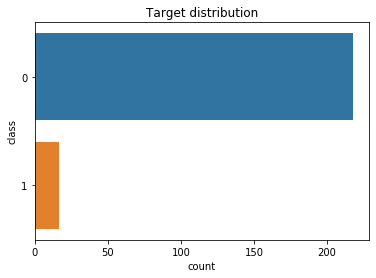

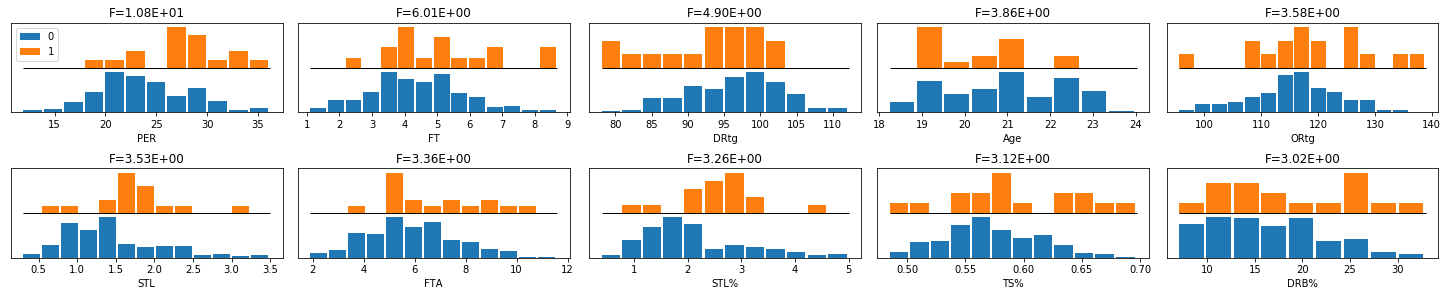

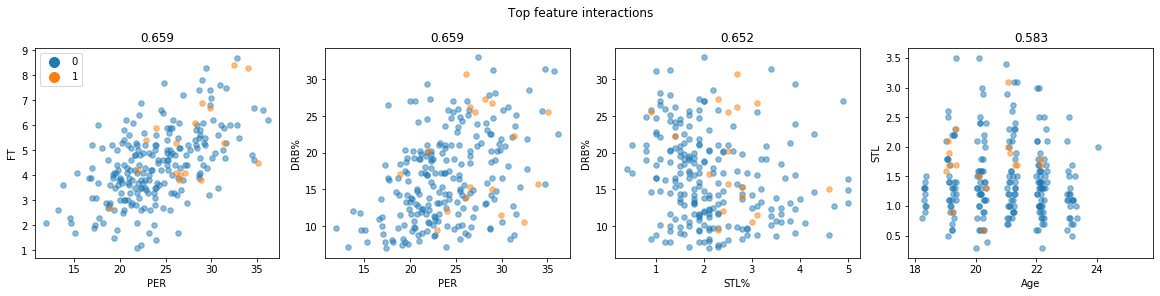

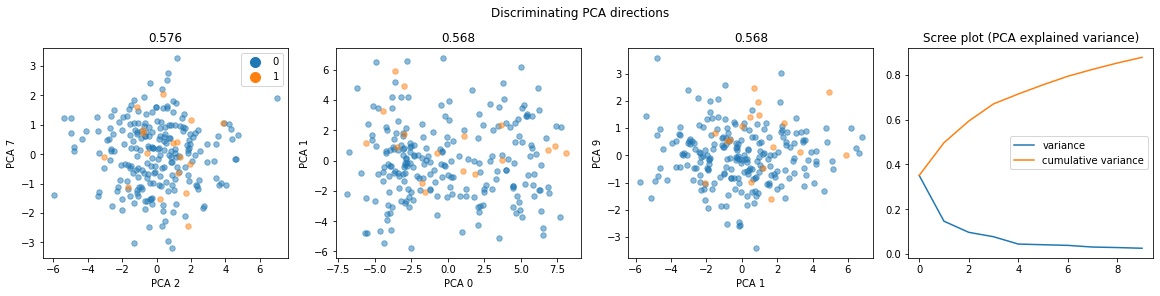

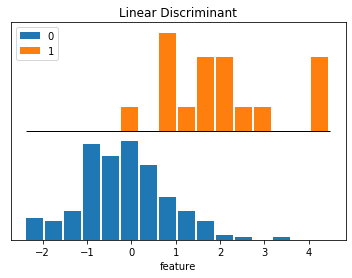

In [12]:
dabl.plot(df, target_col="All Star")

In [13]:
sc = dabl.SimpleClassifier()
sc.fit(df, target_col='All Star')

Running DummyClassifier(strategy='prior')
accuracy: 0.928 average_precision: 0.072 roc_auc: 0.500 recall_macro: 0.500 f1_macro: 0.481
=== new best DummyClassifier(strategy='prior') (using recall_macro):
accuracy: 0.928 average_precision: 0.072 roc_auc: 0.500 recall_macro: 0.500 f1_macro: 0.481

Running GaussianNB()
accuracy: 0.457 average_precision: 0.078 roc_auc: 0.522 recall_macro: 0.537 f1_macro: 0.365
=== new best GaussianNB() (using recall_macro):
accuracy: 0.457 average_precision: 0.078 roc_auc: 0.522 recall_macro: 0.537 f1_macro: 0.365

Running MultinomialNB()
accuracy: 0.924 average_precision: 0.127 roc_auc: 0.602 recall_macro: 0.498 f1_macro: 0.480
Running DecisionTreeClassifier(class_weight='balanced', max_depth=1)
accuracy: 0.595 average_precision: 0.092 roc_auc: 0.590 recall_macro: 0.590 f1_macro: 0.450
=== new best DecisionTreeClassifier(class_weight='balanced', max_depth=1) (using recall_macro):
accuracy: 0.595 average_precision: 0.092 roc_auc: 0.590 recall_macro: 0.590 f

SimpleClassifier(random_state=None, refit=True, shuffle=True, type_hints=None,
                 verbose=1)

In [15]:
X = df.drop(['All Star'], axis=1)
y = df['All Star']

In [16]:
from xverse.transformer import MonotonicBinning

clf = MonotonicBinning()
clf.fit(X, y)

MonotonicBinning(cardinality_cutoff=5, custom_binning=None, feature_names='all',
                 force_bins=4, max_bins=20, prefix=None)

In [17]:
clf.bins

{'Age': array([18.242, 20.176, 22.024, 27.148]),
 'SOS': array([-5.39,  7.17,  8.31, 12.13]),
 'FG': array([ 3.5,  6.3,  7.4, 11.2]),
 'FGA': array([ 7.6, 12.9, 15.5, 23.1]),
 'FG%': array([0.369, 0.453, 0.5  , 0.664]),
 '2P': array([ 2.2,  4.7,  6.1, 10.2]),
 '2PA': array([ 4. ,  9.1, 11.5, 17.3]),
 '2P%': array([0.376, 0.497, 0.541, 0.664]),
 '3P': array([0. , 0.8, 2. , 4.6]),
 '3PA': array([ 0. ,  2.2,  5.4, 11.2]),
 '3P%': array([0.   , 0.304, 0.377, 0.6  ]),
 'FT': array([1.1, 3.8, 5. , 8.7]),
 'FTA': array([ 1.9,  5.1,  6.8, 11.6]),
 'FT%': array([0.295, 0.706, 0.783, 0.925]),
 'TRB': array([ 2.8,  6.1,  9.6, 16.7]),
 'AST': array([ 0.2,  1.9,  3.4, 11.8]),
 'STL': array([0.3, 1.1, 1.6, 3.5]),
 'BLK': array([0. , 0.5, 1.2, 5.8]),
 'TOV': array([1. , 2.3, 3. , 5. ]),
 'PF': array([1.4, 2.5, 3.2, 7.6]),
 'PTS': array([ 9.9, 17.8, 21.1, 32.3]),
 'ORtg': array([ 95.5, 113.4, 119.2, 139. ]),
 'DRtg': array([ 78.1,  93.1,  99.6, 112.2]),
 'PER': array([11.9, 21.9, 25.9, 36.2]),
 'TS%':

In [18]:
output_bins = clf.bins #will be used later in this exercise

In [19]:
out_X = clf.transform(X)

In [20]:
out_X.head()

Player               Age             SOS           FG  \
0     Kyrie Irving  (18.241, 20.176]    (7.17, 8.31]   (6.3, 7.4]   
1   Brandon Knight  (18.241, 20.176]   (8.31, 12.13]   (6.3, 7.4]   
2     Kemba Walker  (20.176, 22.024]   (8.31, 12.13]  (7.4, 11.2]   
3  Jimmer Fredette  (22.024, 27.148]  (-5.391, 7.17]  (7.4, 11.2]   
4      Nolan Smith  (22.024, 27.148]    (7.17, 8.31]  (7.4, 11.2]   

            FGA             FG%                         2P           2PA  \
0  (12.9, 15.5]    (0.5, 0.664]                 (4.7, 6.1]  (3.999, 9.1]   
1  (12.9, 15.5]  (0.368, 0.453]  (2.1990000000000003, 4.7]  (3.999, 9.1]   
2  (15.5, 23.1]  (0.368, 0.453]                (6.1, 10.2]  (11.5, 17.3]   
3  (15.5, 23.1]  (0.368, 0.453]                (6.1, 10.2]  (11.5, 17.3]   
4  (15.5, 23.1]    (0.453, 0.5]                (6.1, 10.2]  (11.5, 17.3]   

              2P%          3P  ...          STL%          BLK%           TOV%  \
0  (0.541, 0.664]  (2.0, 4.6]  ...    (2.3, 5.0]    (1.4, 3.4]   (14.7, 27.8]   
1  (0.375, 0.497]  (2.0, 4.6]  ...  (0.399, 1.7]  (0.099, 1.4]   (14.7, 27.8]   
2  (0.375, 0.497]  (0.8, 2.0]  ...    (2.3, 5.0]  (0.099, 1.4]  (5.699, 12.0]   
3  (0.375, 0.497]  (2.0, 4.6]  ...    (1.7, 2.3]  (0.099, 1.4]   (12.0, 14.7]   
4  (0.497, 0.541]  (0.8, 2.0]  ...    (1.7, 2.3]  (0.099, 1.4]   (14.7, 27.8]   

          AST:TOV  Hght\n(inches)            Weight       RSCI Rank  \
0  (1.375, 3.619]  (68.999, 78.0]  (159.999, 205.0]   (0.999, 24.0]   
1  (0.794, 1.375]  (68.999, 78.0]  (159.999, 205.0]   (0.999, 24.0]   
2  (1.375, 3.619]  (68.999, 78.0]  (159.999, 205.0]   (0.999, 24.0]   
3  (0.794, 1.375]  (68.999, 78.0]  (159.999, 205.0]  (24.0, 45.597]   
4  (1.375, 3.619]  (68.999, 78.0]  (159.999, 205.0]   (0.999, 24.0]   

  Max Measured Wingspan (inches) Avg Measured Wingspan (inches     Difference  
0                (70.999, 81.25]    (70.87899999999999, 80.58]  (-2.251, 3.0]  
1                (70.999, 81.25]    (70.87899999999999, 80.58]     (3.0, 4.5]  
2                (70.999, 81.25]    (70.87899999999999, 80.58]  (-2.251, 3.0]  
3                (70.999, 81.25]    (70.87899999999999, 80.58]  (-2.251, 3.0]  
4                (70.999, 81.25]    (70.87899999999999, 80.58]     (3.0, 4.5]  

[5 rows x 43 columns]

In [21]:
from xverse.transformer import WOE

clf = WOE()
clf.fit(X, y)

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:856: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


WOE(exclude_features=None, feature_names='all', mono_cardinality_cutoff=5,
    mono_custom_binning={'2P': array([ 2.2,  4.7,  6.1, 10.2]),
                         '2P%': array([0.376, 0.497, 0.541, 0.664]),
                         '2PA': array([ 4. ,  9.1, 11.5, 17.3]),
                         '3P': array([0. , 0.8, 2. , 4.6]),
                         '3P%': array([0.   , 0.304, 0.377, 0.6  ]),
                         '3PA': array([ 0. ,  2.2,  5.4, 11.2]),
                         '3PAr': array([0.   , 0.178, 0.362, 0.666]),
                         'AST': array([ 0.2,  1.9,  3.4,...
              'PER': {Interval(11.899000000000001, 21.9, closed='right'): -1.843167435939566,
                      Interval(21.9, 25.9, closed='right'): -0.6267721116150727,
                      Interval(25.9, 36.2, closed='right'): 0.9418438062987725},
              'PF': {Interval(1.399, 2.5, closed='right'): 0.05258174681253679,
                     Interval(2.5, 3.2, closed='right'): -0.0636780

In [22]:
clf.woe_df.head(10)

Variable_Name                   Category  Count  Event  Non_Event  \
0            2P  (2.1990000000000003, 4.7]     79      3         76   
1            2P                 (4.7, 6.1]     78      7         71   
2            2P                (6.1, 10.2]     78      7         71   
3           2P%             (0.375, 0.497]     80      6         74   
4           2P%             (0.497, 0.541]     77      4         73   
5           2P%             (0.541, 0.664]     78      7         71   
6           2PA               (3.999, 9.1]     81      3         78   
7           2PA                (9.1, 11.5]     78      8         70   
8           2PA               (11.5, 17.3]     76      6         70   
9            3P              (-0.001, 0.8]     82      5         77   

   Event_Rate  Non_Event_Rate  Event_Distribution  Non_Event_Distribution  \
0    0.037975        0.962025            0.176471                0.348624   
1    0.089744        0.910256            0.411765                0.325688   
2    0.089744        0.910256            0.411765                0.325688   
3    0.075000        0.925000            0.352941                0.339450   
4    0.051948        0.948052            0.235294                0.334862   
5    0.089744        0.910256            0.411765                0.325688   
6    0.037037        0.962963            0.176471                0.357798   
7    0.102564        0.897436            0.470588                0.321101   
8    0.078947        0.921053            0.352941                0.321101   
9    0.060976        0.939024            0.294118                0.353211   

        WOE  Information_Value  
0 -0.680839           0.157581  
1  0.234512           0.157581  
2  0.234512           0.157581  
3  0.038976           0.055848  
4 -0.352883           0.055848  
5  0.234512           0.055848  
6 -0.706815           0.188314  
7  0.382228           0.188314  
8  0.094546           0.188314  
9 -0.183086           0.033374

In [23]:
clf.iv_df

Variable_Name  Information_Value
28                             PER           1.112234
34                             STL           0.837413
35                            STL%           0.750751
9                          AST:TOV           0.687161
8                             AST%           0.669478
21                             FT%           0.431568
17                              FG           0.423908
30                             PTS           0.411805
7                              AST           0.360765
18                             FG%           0.324427
10                             Age           0.324427
20                              FT           0.261947
32                       RSCI Rank           0.261618
36                             TOV           0.255928
16                      Difference           0.246486
2                              2PA           0.188314
22                             FTA           0.173410
25  Max Measured Wingspan (inches)           0.167252
0                               2P           0.157581
15                            DRtg           0.150023
23                             FTr           0.114382
14                            DRB%           0.105887
37                            TOV%           0.101808
42                            eFG%           0.076904
11   Avg Measured Wingspan (inches           0.069840
40                             TS%           0.068609
12                             BLK           0.063458
27                            ORtg           0.063003
1                              2P%           0.055848
13                            BLK%           0.045811
39                            TRB%           0.043488
26                            ORB%           0.039383
3                               3P           0.033374
38                             TRB           0.032204
41                          Weight           0.017130
24                  Hght\n(inches)           0.014110
6                             3PAr           0.013647
5                              3PA           0.012807
33                             SOS           0.011787
4                              3P%           0.009639
19                             FGA           0.004951
29                              PF           0.002518
31                          Player           0.000000

In [24]:
output_woe_bins = clf.woe_bins #future transformation

In [25]:
output_woe_bins

{'2P': {Interval(2.1990000000000003, 4.7, closed='right'): -0.6808393328853486,
  Interval(4.7, 6.1, closed='right'): 0.23451199074687074,
  Interval(6.1, 10.2, closed='right'): 0.23451199074687074},
 '2P%': {Interval(0.375, 0.497, closed='right'): 0.03897609475675815,
  Interval(0.497, 0.541, closed='right'): -0.35288336129562753,
  Interval(0.541, 0.664, closed='right'): 0.23451199074687074},
 '2PA': {Interval(3.999, 9.1, closed='right'): -0.7068148192886091,
  Interval(9.1, 11.5, closed='right'): 0.3822280183633498,
  Interval(11.5, 17.3, closed='right'): 0.09454594591156902},
 '3P': {Interval(-0.001, 0.8, closed='right'): -0.18308579068671052,
  Interval(0.8, 2.0, closed='right'): 0.23451199074687074,
  Interval(2.0, 4.6, closed='right'): -0.08777561088238572},
 '3P%': {Interval(-0.001, 0.304, closed='right'): 0.05258174681253679,
  Interval(0.304, 0.377, closed='right'): -0.14334546203719653,
  Interval(0.377, 0.6, closed='right'): 0.08036131091961252},
 '3PA': {Interval(-0.001, 2

In [27]:
clf.transform(X).head()

Player       Age       SOS        FG       FGA       FG%        2P  \
0     0.0  0.368043  0.052582  0.605372 -0.101960  0.234512  0.234512   
1     0.0  0.368043  0.094546  0.605372 -0.101960  0.368043 -0.680839   
2     0.0  0.234512  0.094546 -0.101960  0.066375  0.368043  0.234512   
3     0.0 -1.086304 -0.156768 -0.101960  0.066375  0.368043  0.234512   
4     0.0 -1.086304  0.052582 -0.101960  0.066375 -1.086304  0.234512   

        2PA       2P%        3P  ...      STL%      BLK%      TOV%   AST:TOV  \
0 -0.706815  0.234512 -0.087776  ...  0.861801  0.206732  0.382228  0.234512   
1 -0.706815  0.038976 -0.087776  ... -1.186388  0.038976  0.382228  0.528999   
2  0.094546  0.038976  0.234512  ...  0.861801  0.038976 -0.143345  0.234512   
3  0.094546  0.038976 -0.087776  ... -0.584212  0.038976 -0.366489  0.528999   
4  0.094546 -0.352883  0.234512  ... -0.584212  0.038976  0.382228  0.234512   

   Hght\n(inches)    Weight  RSCI Rank  Max Measured Wingspan (inches)  \
0       -0.097928 -0.156768   0.340264                        0.286918   
1       -0.097928 -0.156768   0.340264                        0.286918   
2       -0.097928 -0.156768   0.340264                        0.286918   
3       -0.097928 -0.156768  -0.827443                        0.286918   
4       -0.097928 -0.156768   0.340264                        0.286918   

   Avg Measured Wingspan (inches  Difference  
0                       0.220526    0.090473  
1                       0.220526   -0.960264  
2                       0.220526    0.090473  
3                       0.220526    0.090473  
4                       0.220526   -0.960264  

[5 rows x 43 columns]

In [28]:
from xverse.graph import BarCharts

In [29]:
woe_df = clf.woe_df

In [30]:
clf = BarCharts(bar_type='v')

/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/core.py:338: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)
/opt/anaconda3/lib/python3.7/site-packages/xverse/graph/_bivariate_charts.py:152: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


BarCharts(bar_color='#058caa', bar_type='v', exclude_features=None,
          feature_names='all', fig_size=(8, 6), num_color='#ed8549',
          plot_metric='mean')

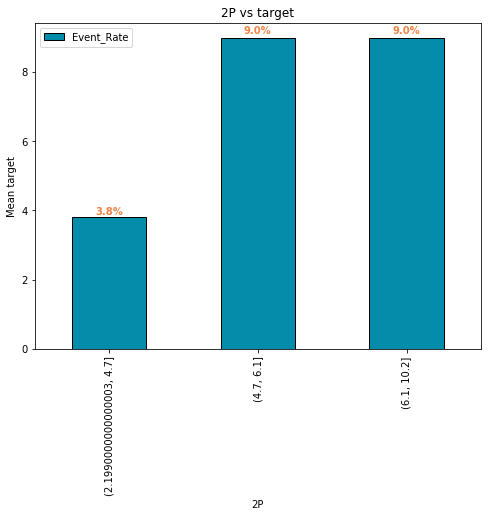

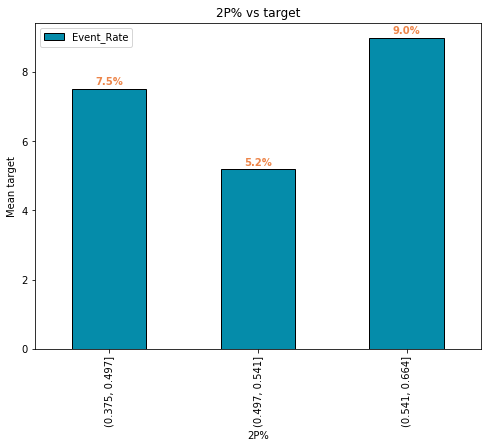

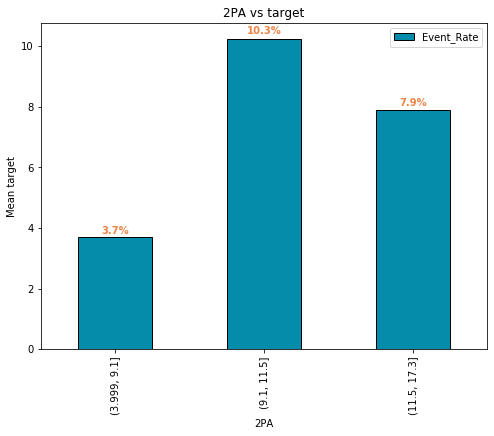

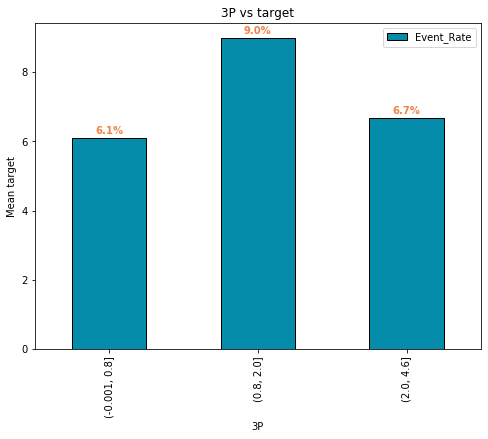

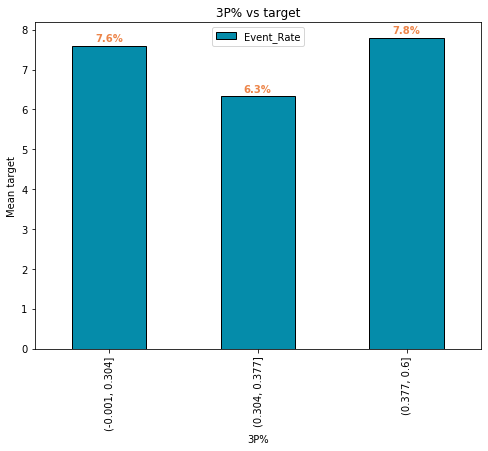

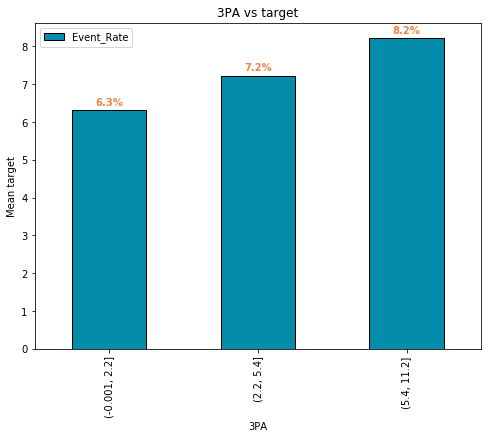

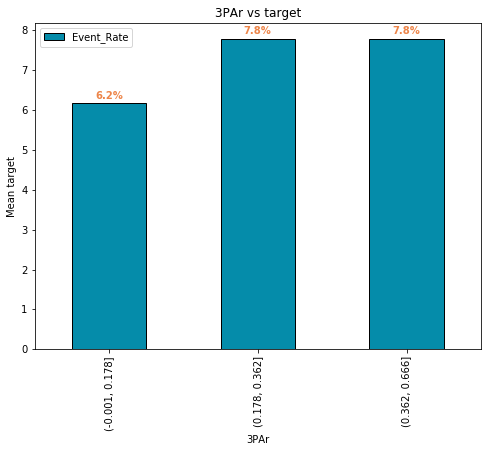

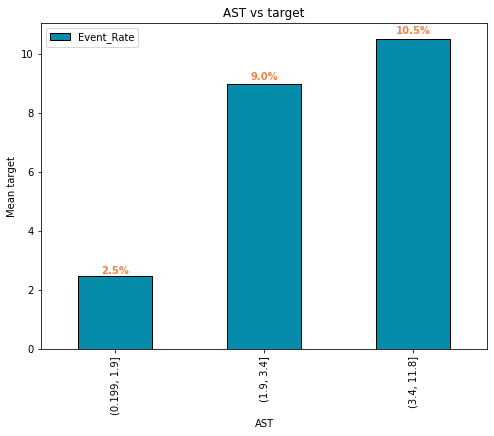

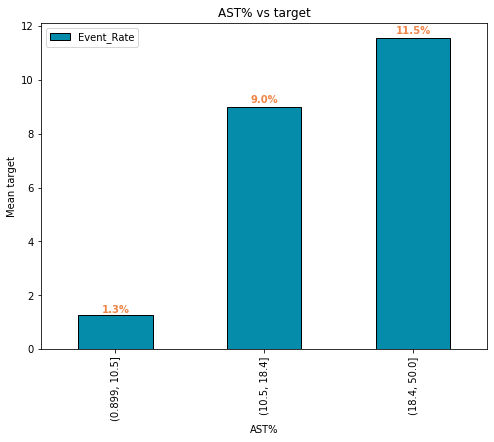

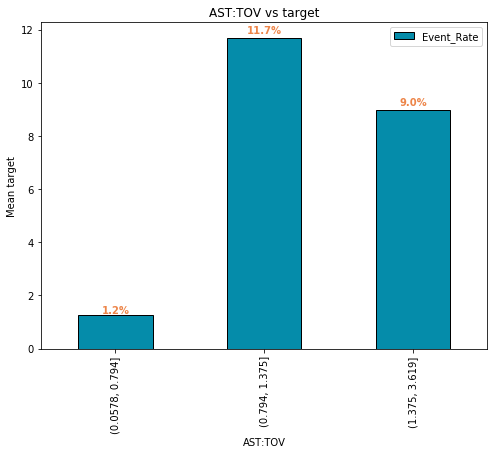

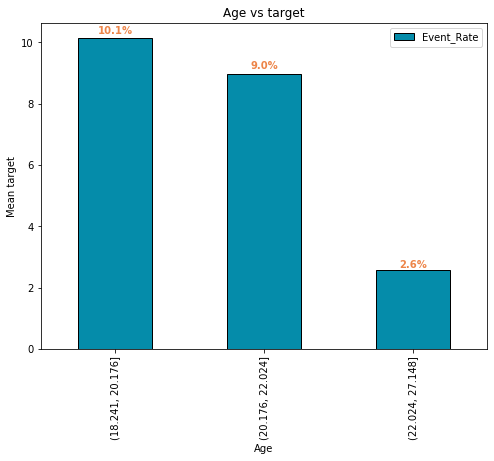

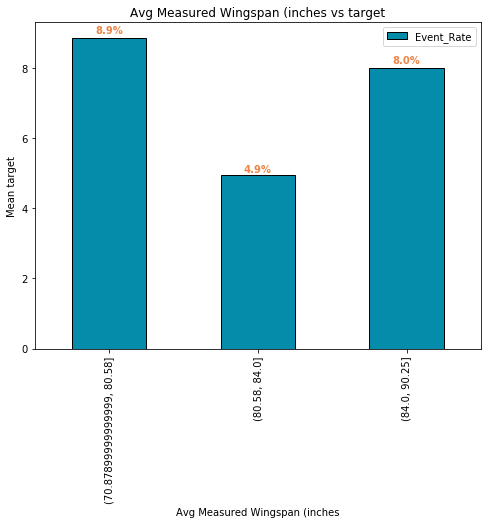

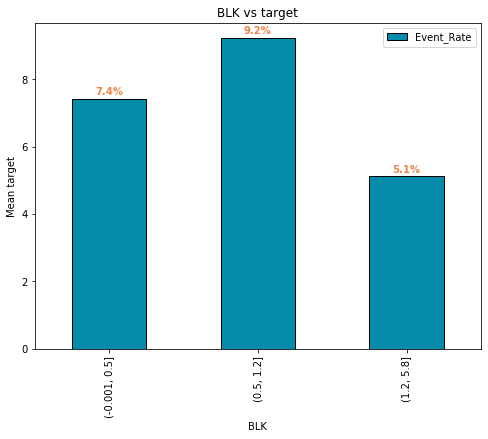

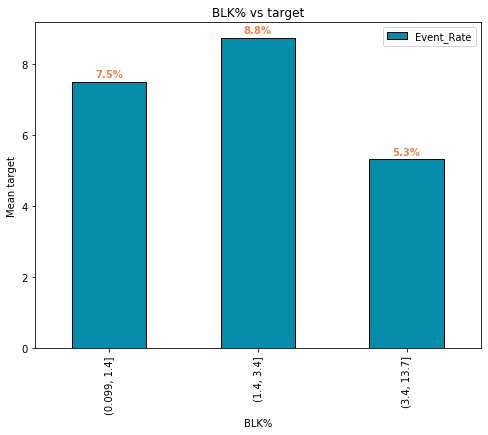

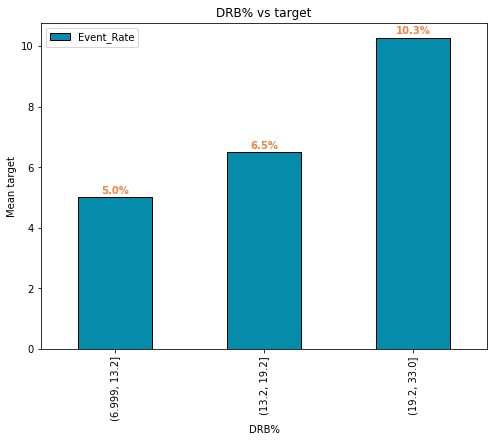

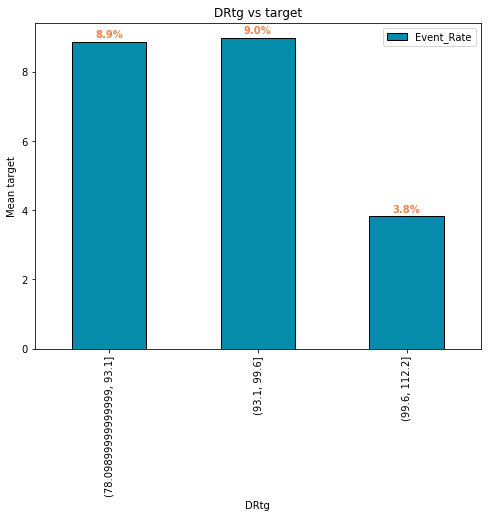

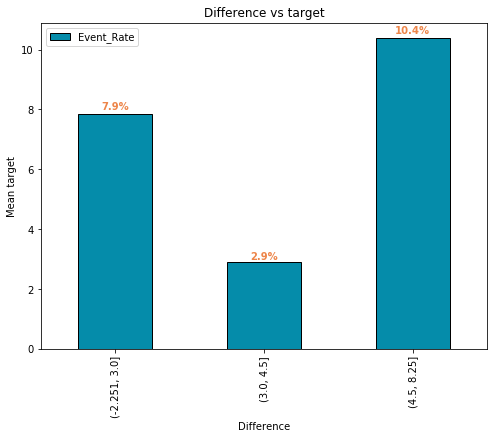

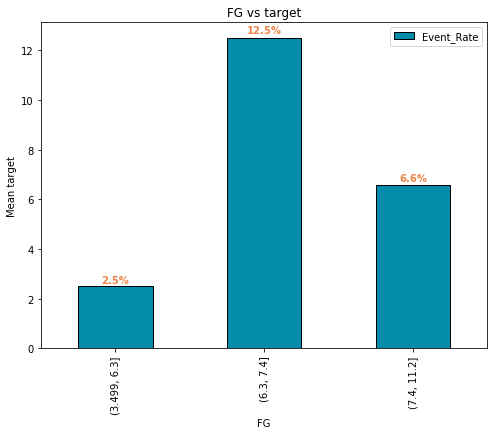

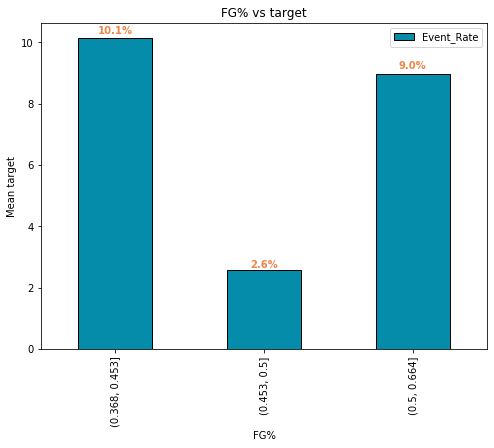

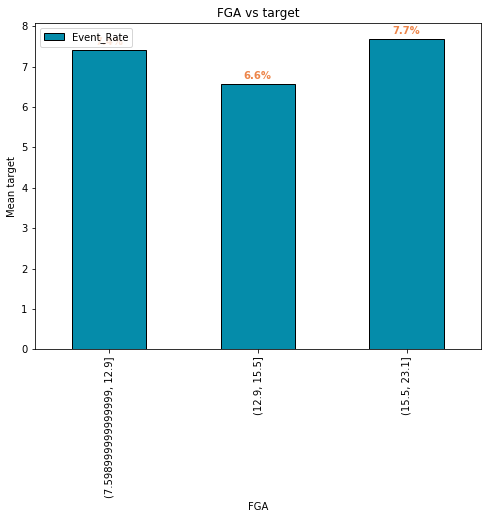

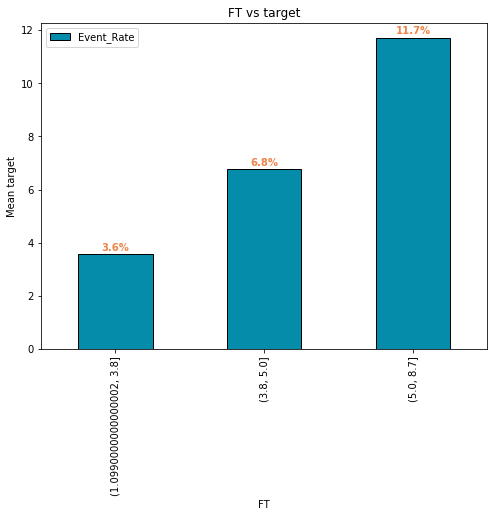

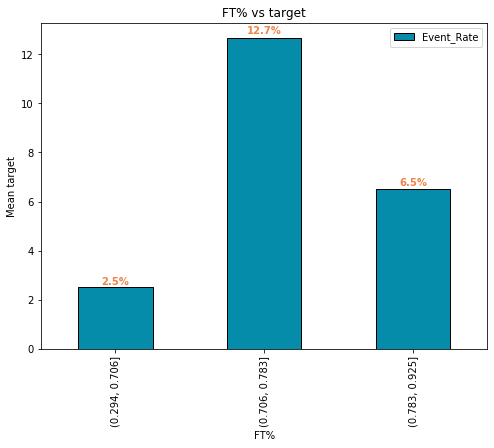

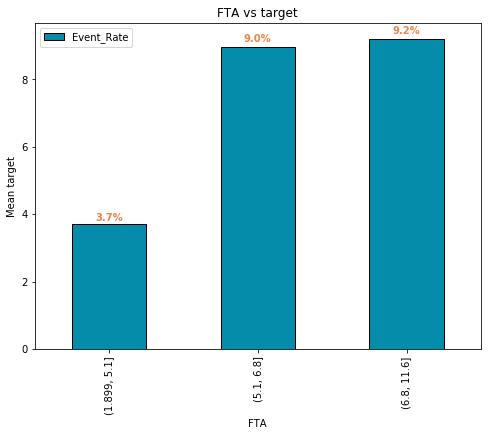

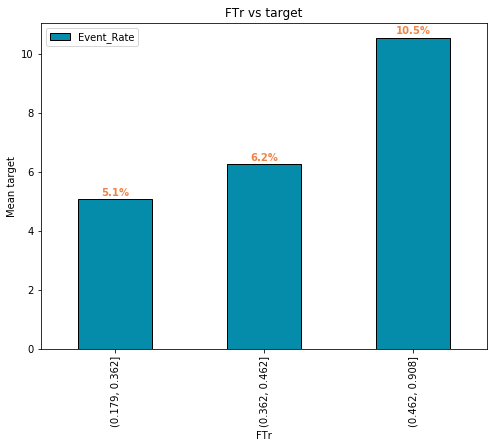

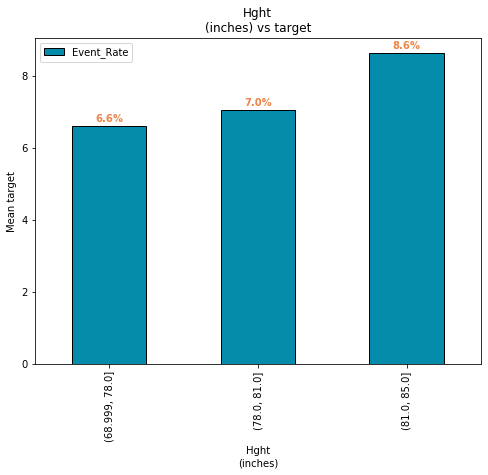

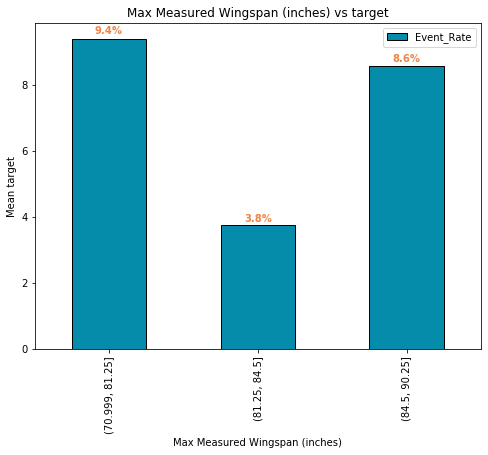

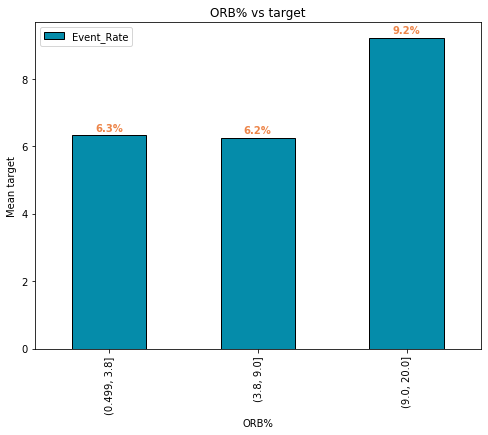

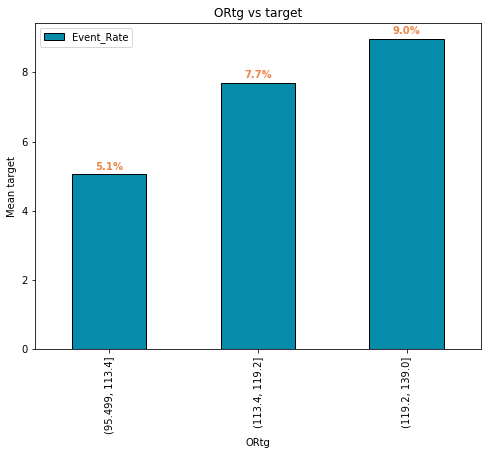

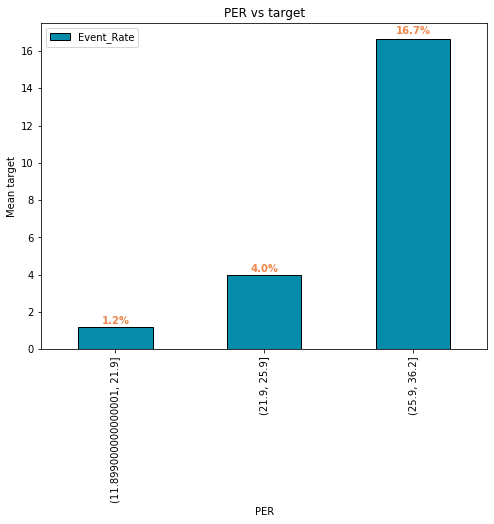

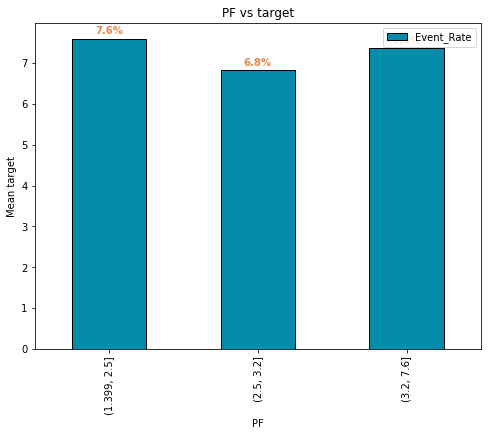

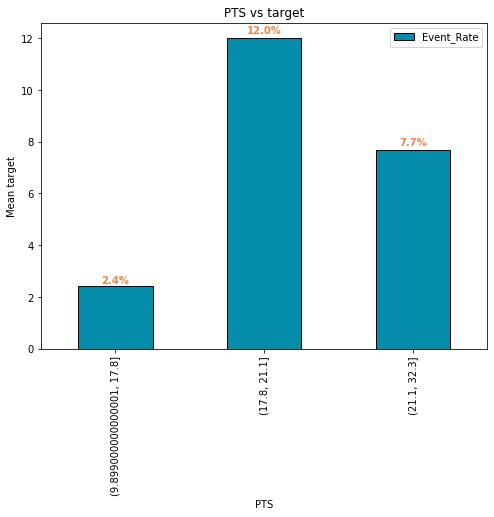

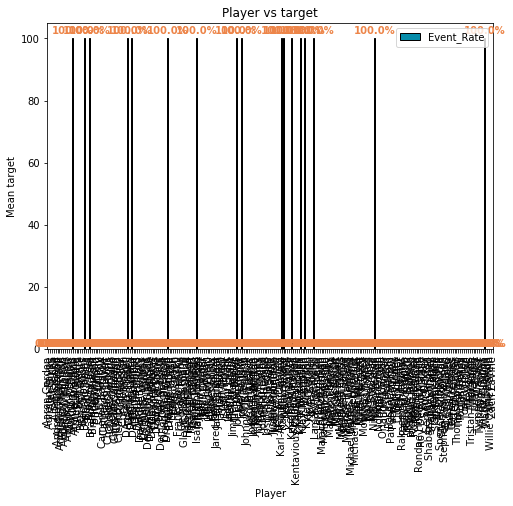

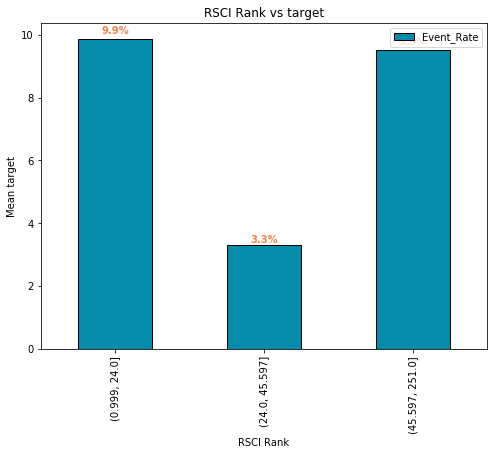

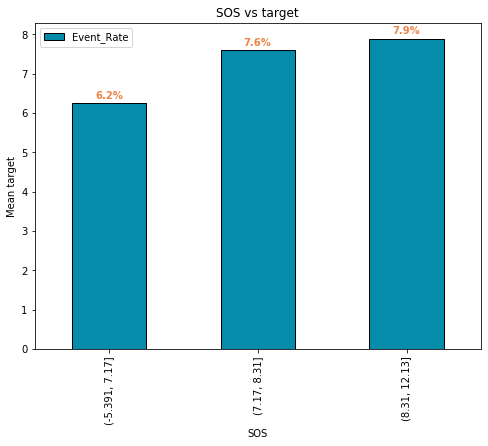

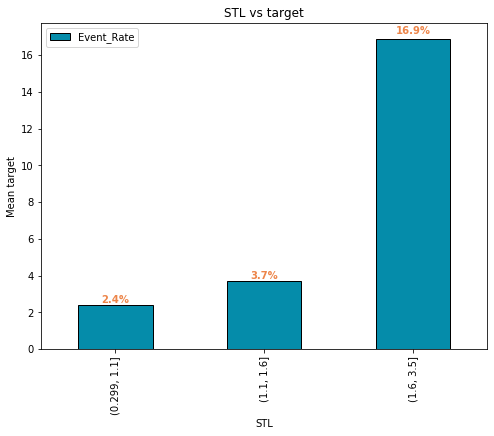

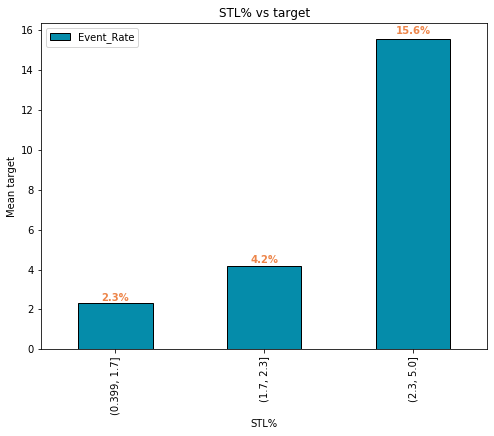

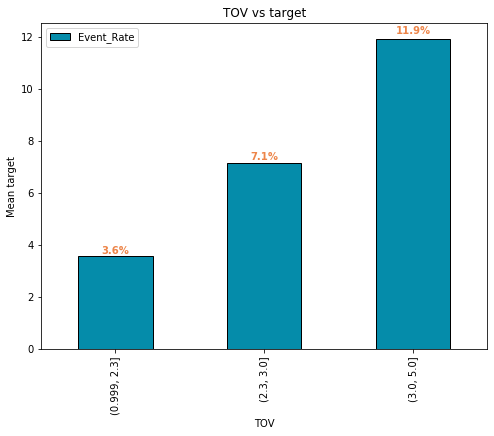

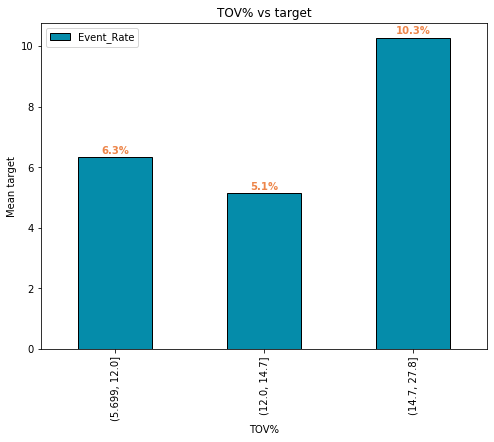

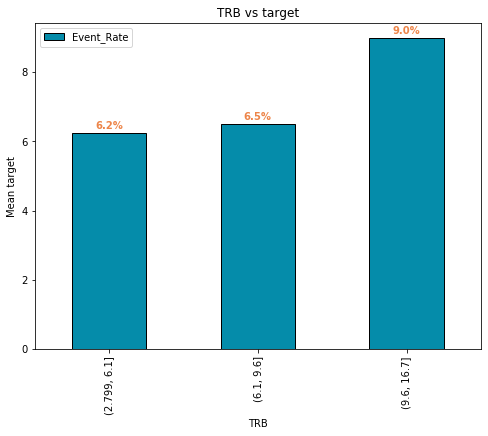

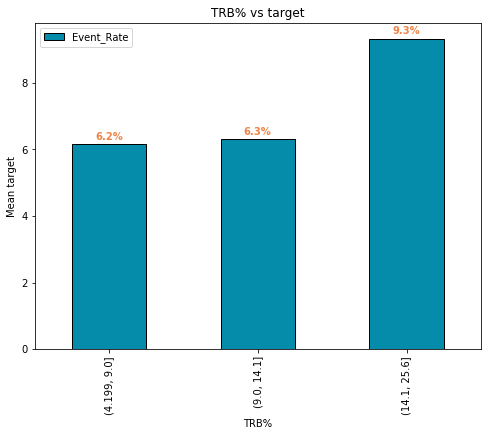

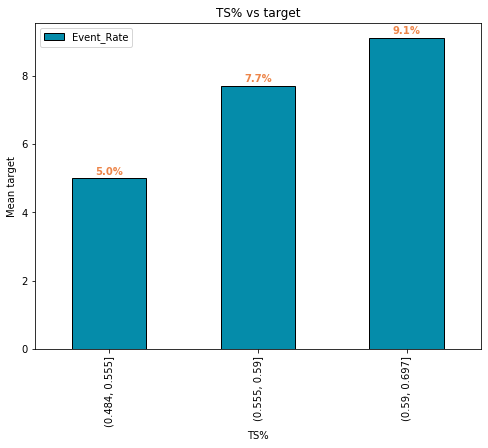

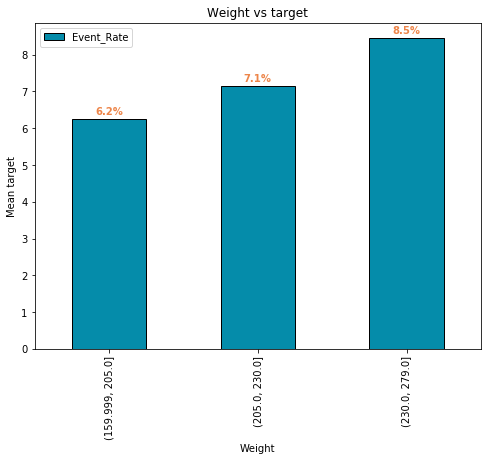

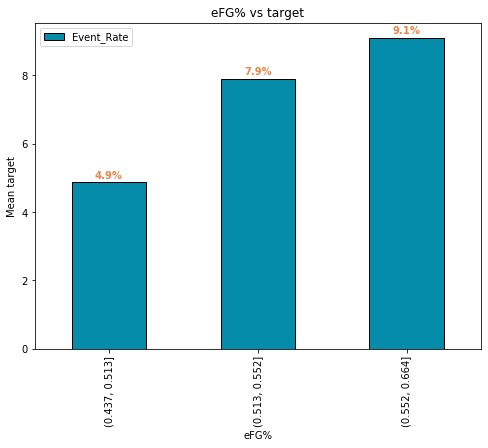

In [31]:
clf.plot(woe_df)

In [32]:
from xverse.ensemble import VotingSelector

clf = VotingSelector()
clf.fit(X, y)

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:856: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warn

VotingSelector(exclude_features=None, feature_names='all',
               handle_category='woe', minimum_votes=0, no_of_features=21,
               numerical_missing_values='median',
               selection_techniques=['WOE', 'RF', 'RFE', 'ETC', 'CS', 'L_ONE'])

In [33]:
clf.available_techniques

['WOE', 'RF', 'RFE', 'ETC', 'CS', 'L_ONE']

In [34]:
clf.feature_importances_

Variable_Name  Information_Value  Random_Forest  \
0                              PER           1.112234       0.036117   
1                              STL           0.837413       0.013662   
2                             STL%           0.750751       0.049727   
3                          AST:TOV           0.687161       0.000000   
4                             AST%           0.669478       0.003825   
5                              FT%           0.431568       0.034923   
6                               FG           0.423908       0.001148   
7                              PTS           0.411805       0.018085   
8                              AST           0.360765       0.023591   
9                              FG%           0.324427       0.026303   
10                             Age           0.324427       0.032856   
11                              FT           0.261947       0.030099   
12                       RSCI Rank           0.261618       0.029331   
13                             TOV           0.255928       0.019381   
14                      Difference           0.246486       0.013116   
15                             2PA           0.188314       0.032695   
16                             FTA           0.173410       0.015201   
17  Max Measured Wingspan (inches)           0.167252       0.053653   
18                              2P           0.157581       0.022595   
19                            DRtg           0.150023       0.016589   
20                             FTr           0.114382       0.008782   
21                            DRB%           0.105887       0.014131   
22                            TOV%           0.101808       0.020847   
23                            eFG%           0.076904       0.034248   
24   Avg Measured Wingspan (inches           0.069840       0.014367   
25                             TS%           0.068609       0.067913   
26                             BLK           0.063458       0.041751   
27                            ORtg           0.063003       0.042286   
28                             2P%           0.055848       0.025011   
29                            BLK%           0.045811       0.003643   
30                            TRB%           0.043488       0.022874   
31                            ORB%           0.039383       0.015541   
32                              3P           0.033374       0.034546   
33                             TRB           0.032204       0.032368   
34                          Weight           0.017130       0.018643   
35                  Hght\n(inches)           0.014110       0.030167   
36                            3PAr           0.013647       0.015317   
37                             3PA           0.012807       0.015296   
38                             SOS           0.011787       0.015247   
39                             3P%           0.009639       0.041119   
40                             FGA           0.004951       0.013004   
41                              PF           0.002518       0.000000   
42                          Player           0.000000       0.000000   

    Recursive_Feature_Elimination  Extra_Trees  Chi_Square     L_One  
0                        0.518390     0.037674    0.748424  0.007550  
1                        0.000000     0.035804    0.378044  0.000000  
2                       -0.092467     0.024048    0.348089  0.000000  
3                        0.000000     0.024760    0.049726  0.000000  
4                        0.000000     0.014528    0.329950  0.004921  
5                        0.142114     0.008191    0.072870  0.000000  
6                       -0.403231     0.042447    0.034564  0.000000  
7                       -0.513608     0.015207    0.147359  0.000000  
8                        0.000000     0.028700    0.271181  0.000000  
9                        0.000000     0.022056    0.068803  0.000000  
10                      -0.506693     0.029136    0.325766  0.000000  


In [35]:
clf.feature_votes_

Variable_Name  Information_Value  Random_Forest  \
0                              PER                  1              1   
2                             STL%                  1              1   
10                             Age                  1              1   
11                              FT                  1              1   
17  Max Measured Wingspan (inches)                  1              1   
8                              AST                  1              1   
13                             TOV                  1              0   
12                       RSCI Rank                  1              1   
1                              STL                  1              0   
35                  Hght\n(inches)                  0              1   
30                            TRB%                  0              1   
19                            DRtg                  1              0   
33                             TRB                  0              1   
9                              FG%                  1              1   
7                              PTS                  1              0   
6                               FG                  1              0   
5                              FT%                  1              1   
20                             FTr                  1              0   
23                            eFG%                  0              1   
25                             TS%                  0              1   
14                      Difference                  1              0   
18                              2P                  1              1   
16                             FTA                  1              0   
15                             2PA                  1              1   
4                             AST%                  1              0   
3                          AST:TOV                  1              0   
27                            ORtg                  0              1   
32                              3P                  0              1   
21                            DRB%                  0              0   
28                             2P%                  0              1   
26                             BLK                  0              1   
24   Avg Measured Wingspan (inches                  0              0   
22                            TOV%                  0              0   
29                            BLK%                  0              0   
31                            ORB%                  0              0   
37                             3PA                  0              0   
38                             SOS                  0              0   
39                             3P%                  0              1   
40                             FGA                  0              0   
34                          Weight                  0              0   
36                            3PAr                  0              0   
41                              PF                  0              0   
42                          Player                  0              0   

    Recursive_Feature_Elimination  Extra_Trees  Chi_Square  L_One  Votes  
0                               1            1           1      1      6  
2                               1            1           1      1      6  
10                              1            1           1      1      6  
11                              1            0           1      1      5  
17                              1            1           0      1      5  
8                               0            1           1      1      5  
13                              1            1           1      1      5  
12                              0            1           0      1      4  
1                               0            1           1      1      4  
35                              1            1           0      1      4  
30                         

In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split, GridSearchCV

In [37]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [38]:
list(df.columns) 

['Player',
 'Age',
 'SOS',
 'FG',
 'FGA',
 'FG%',
 '2P',
 '2PA',
 '2P%',
 '3P',
 '3PA',
 '3P%',
 'FT',
 'FTA',
 'FT%',
 'TRB',
 'AST',
 'STL',
 'BLK',
 'TOV',
 'PF',
 'PTS',
 'ORtg',
 'DRtg',
 'PER',
 'TS%',
 'eFG%',
 '3PAr',
 'FTr',
 'ORB%',
 'DRB%',
 'TRB%',
 'AST%',
 'STL%',
 'BLK%',
 'TOV%',
 'AST:TOV',
 'Hght\n(inches)',
 'Weight',
 'RSCI Rank',
 'Max Measured Wingspan (inches)',
 'Avg Measured Wingspan (inches',
 'Difference',
 'All Star']

In [39]:
features = ['Age','SOS','FG','FGA','FG%', '2P','2PA','2P%','3P','3PA','3P%','FT','FTA','FT%','TRB','AST',
'STL','BLK','TOV','PF','PTS','ORtg','DRtg','PER','TS%','eFG%','3PAr','FTr', 'ORB%','DRB%','TRB%','AST%','STL%',
 'BLK%','TOV%','AST:TOV','Hght\n(inches)','Weight','RSCI Rank', 'Max Measured Wingspan (inches)',
'Avg Measured Wingspan (inches', 'Difference']

In [40]:
import seaborn as sns

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


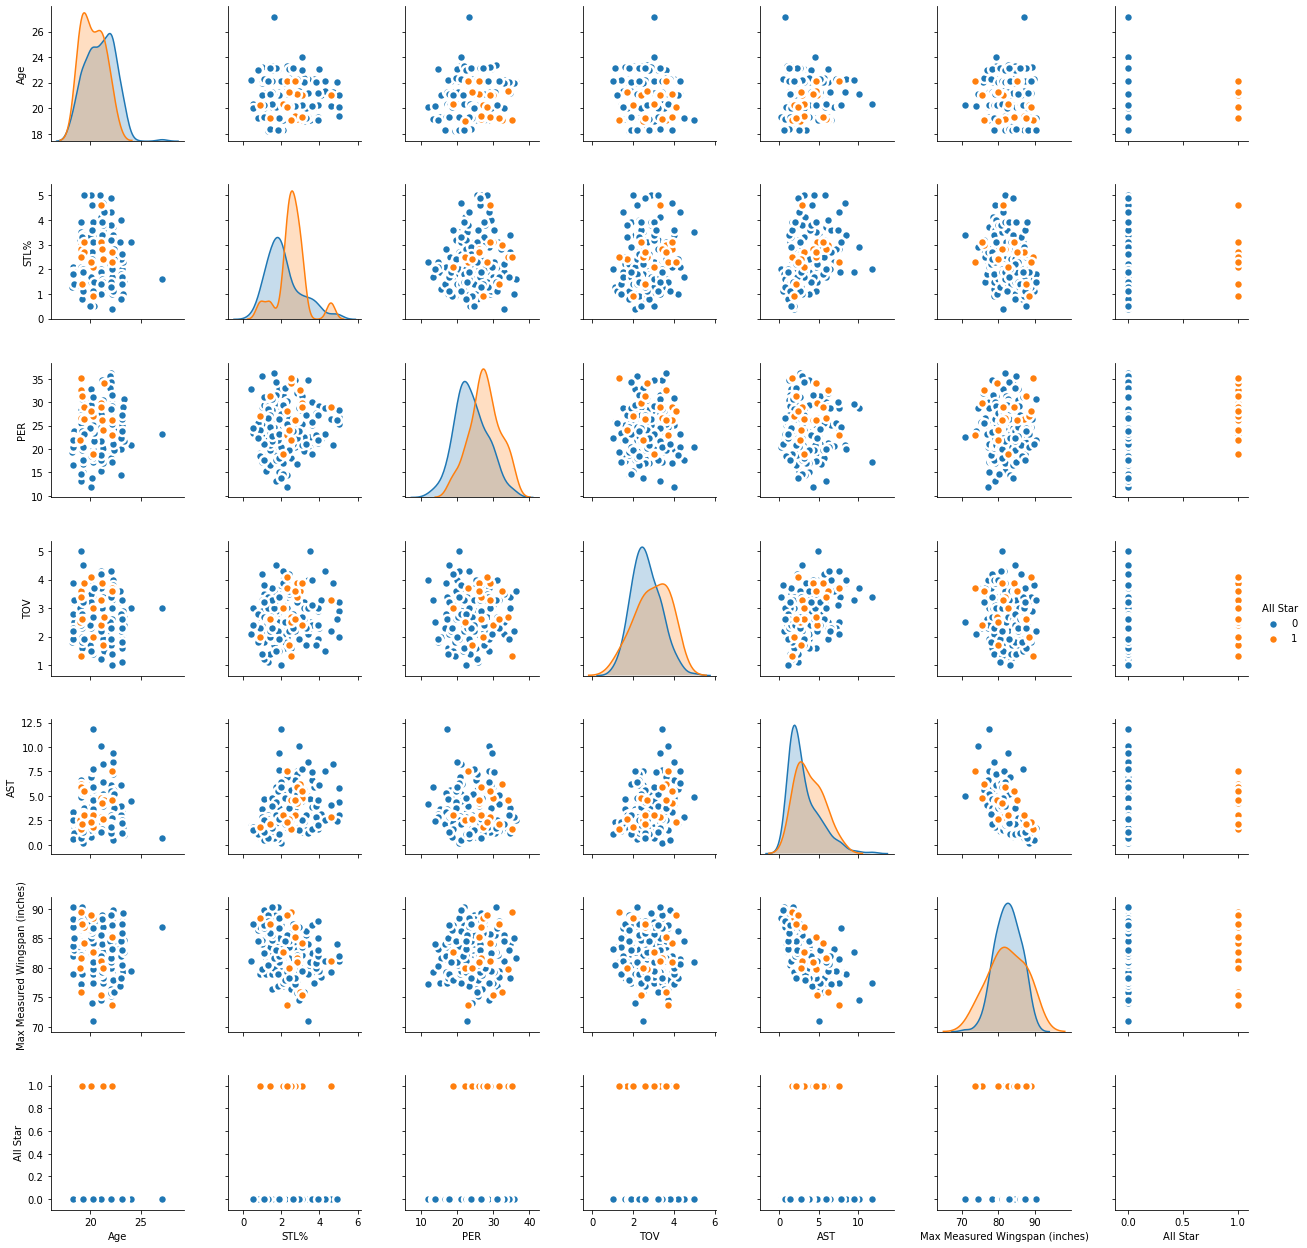

In [41]:
sns.pairplot(df[['Age','STL%', 'PER','TOV', 'AST', 'Max Measured Wingspan (inches)', 'All Star']], hue='All Star',kind="scatter",plot_kws=dict(s=80, edgecolor="white", linewidth=2.5))

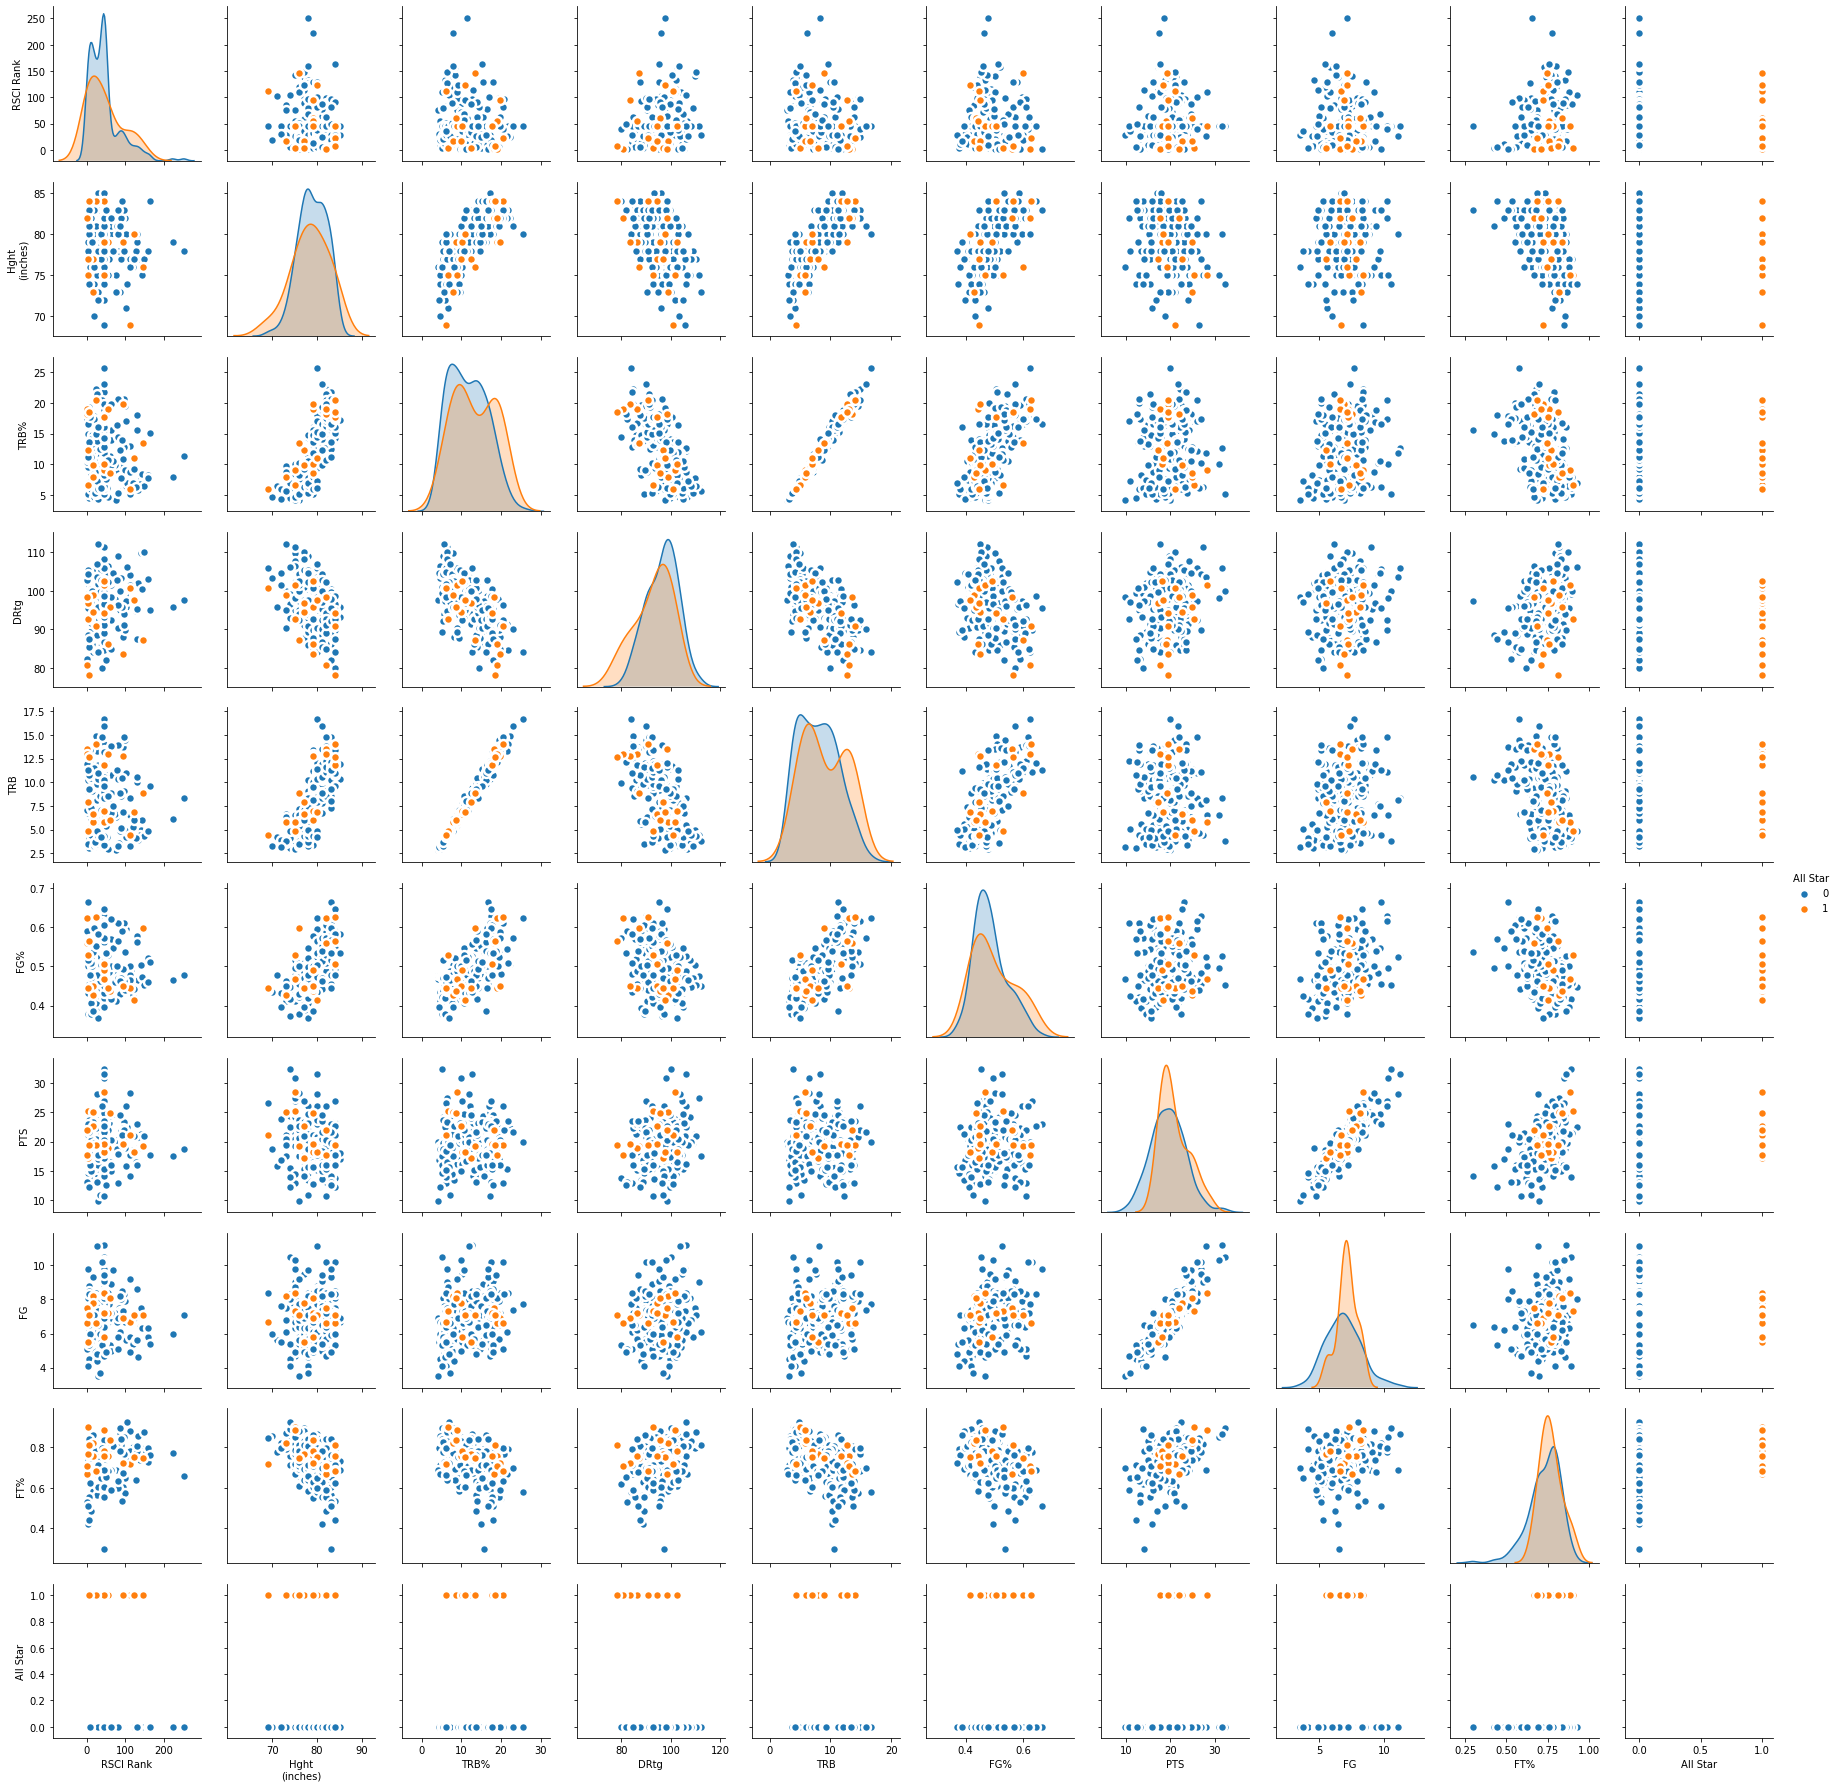

In [42]:
sns.pairplot(df[['RSCI Rank','Hght\n(inches)', 'TRB%','DRtg', 'TRB', 'FG%', 'PTS','FG','FT%', 'All Star']], hue='All Star',kind="scatter",plot_kws=dict(s=80, edgecolor="white", linewidth=2.5))

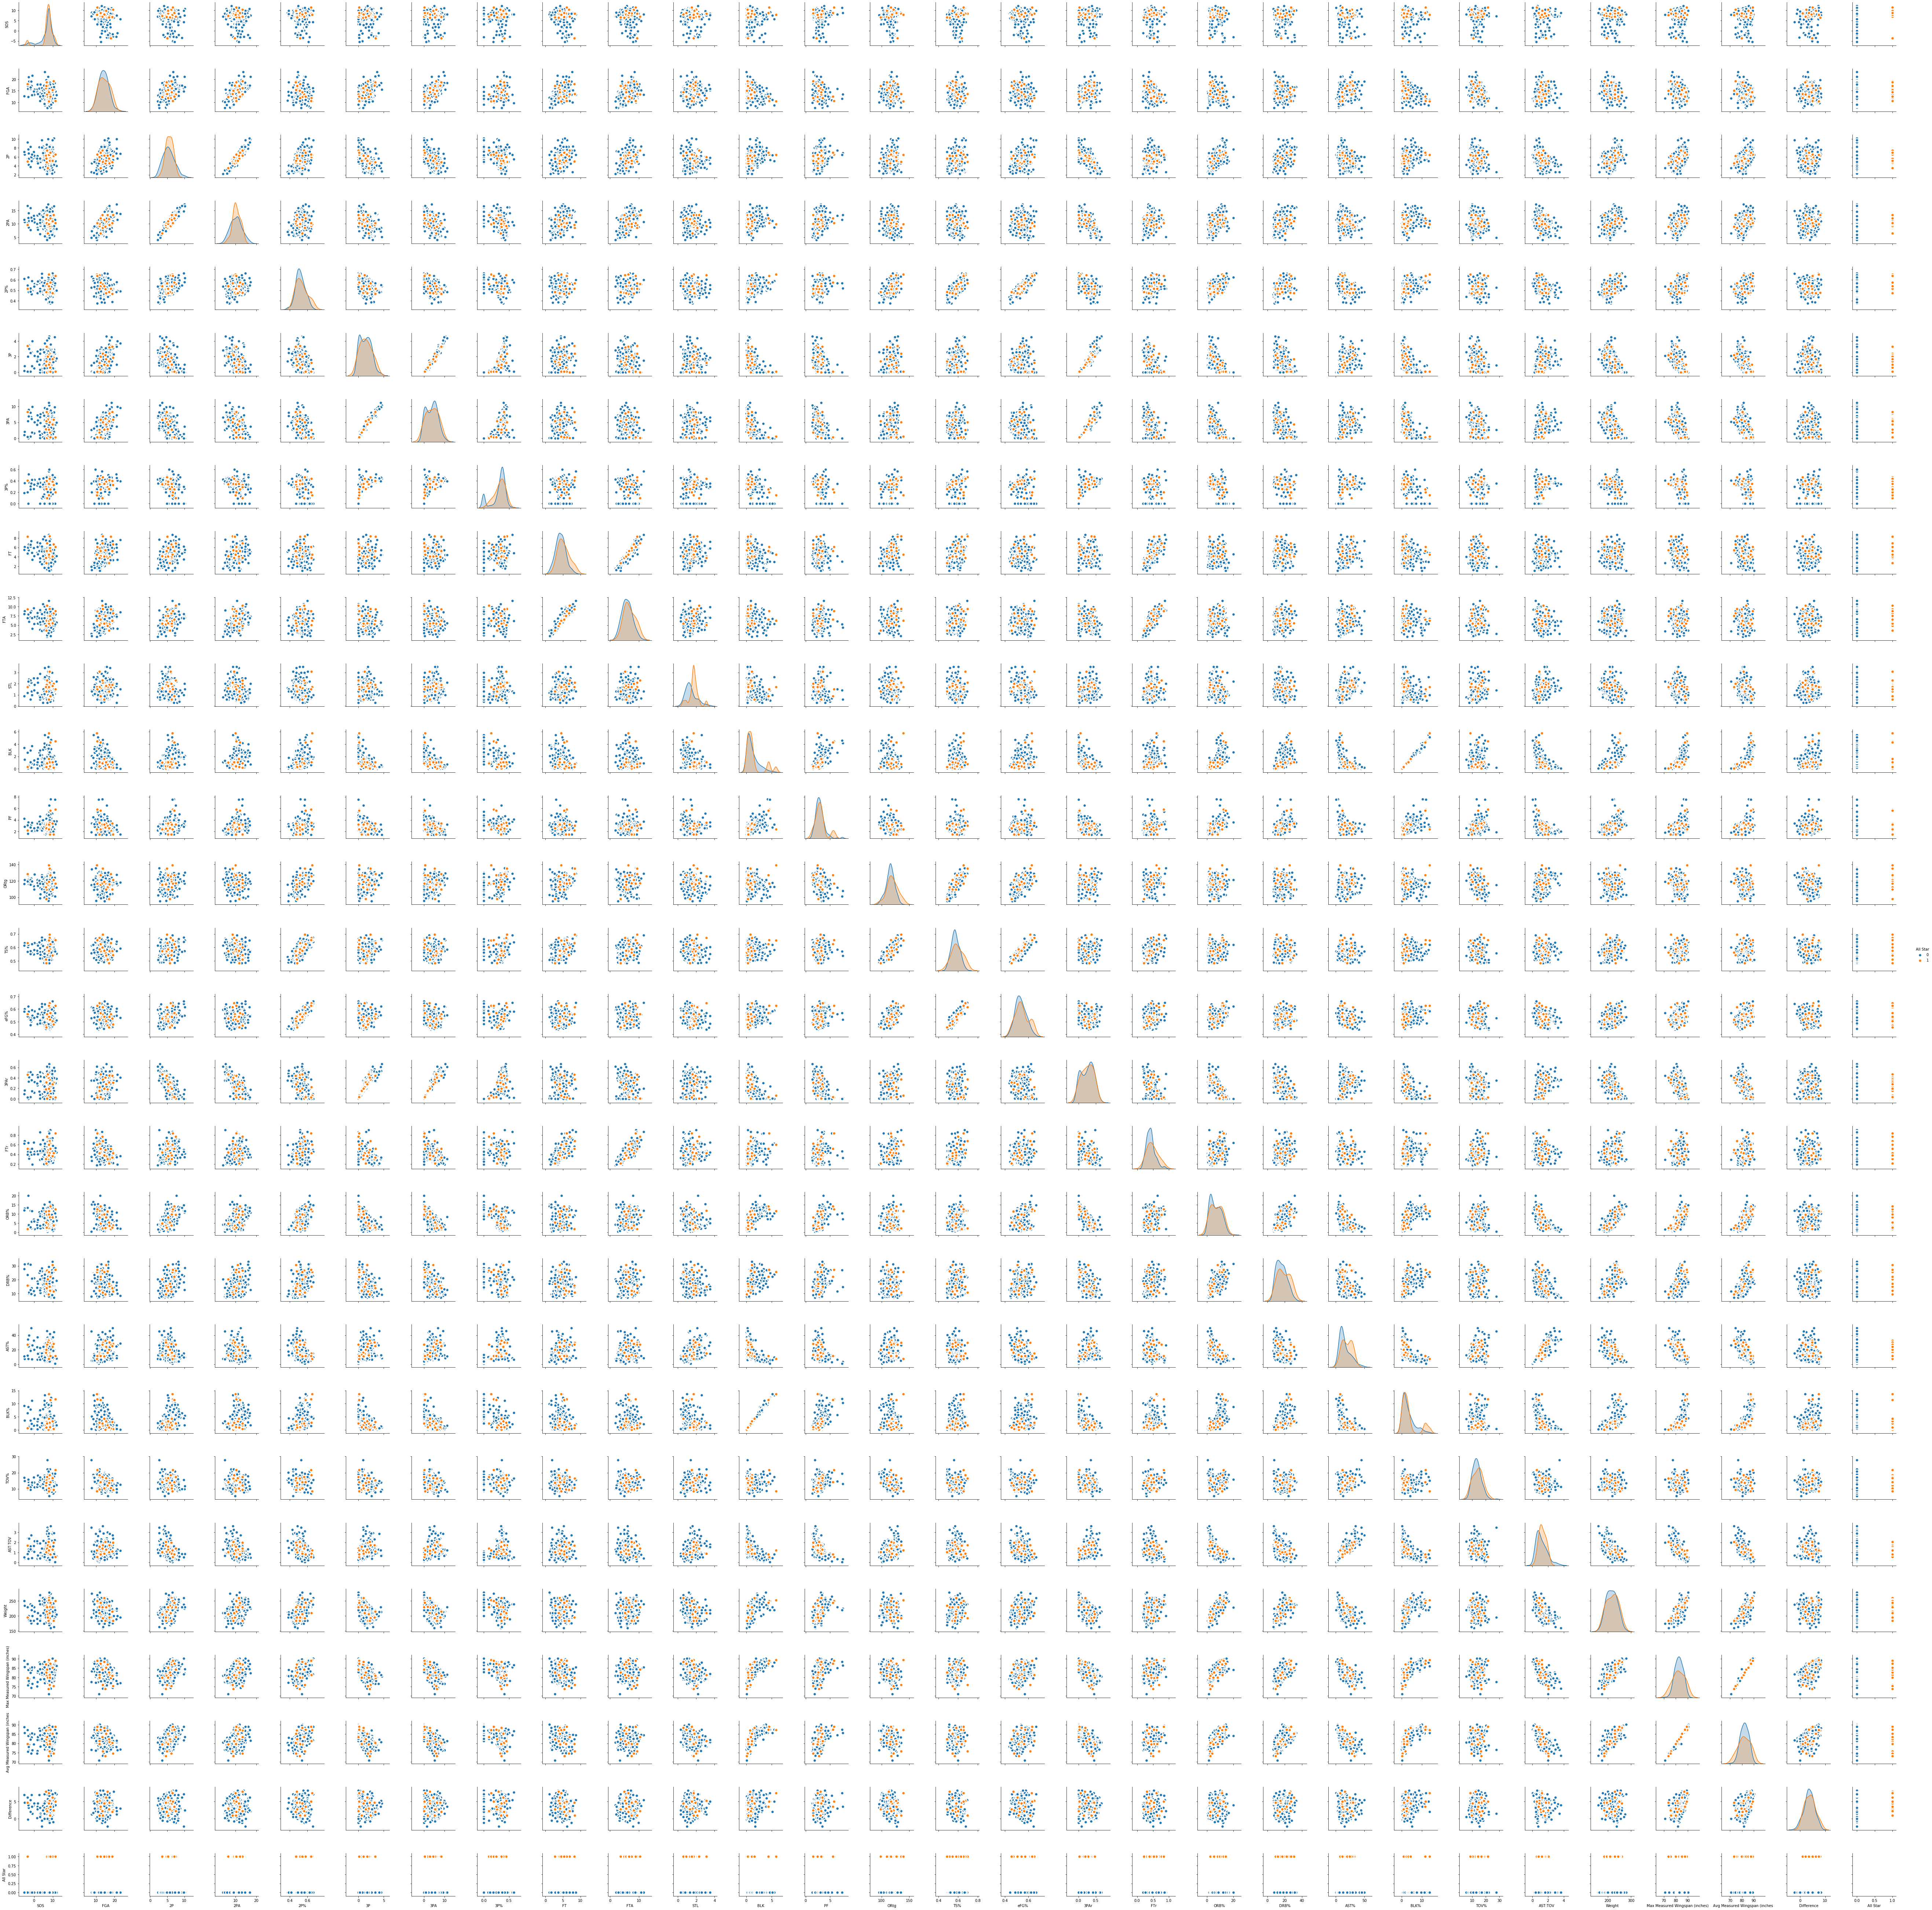

In [43]:
sns.pairplot(df[['SOS','FGA','2P','2PA','2P%','3P','3PA','3P%','FT','FTA',
'STL','BLK','PF','ORtg','TS%','eFG%','3PAr','FTr', 'ORB%','DRB%','AST%',
 'BLK%','TOV%','AST:TOV','Weight', 'Max Measured Wingspan (inches)',
'Avg Measured Wingspan (inches', 'Difference','All Star']], hue='All Star',kind="scatter",plot_kws=dict(s=80, edgecolor="white", linewidth=2.5))

In [45]:
X = df.drop(['Player','All Star'], axis=1)
y = df['All Star']

/opt/anaconda3/lib/python3.7/site-packages/yellowbrick/base.py:246: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


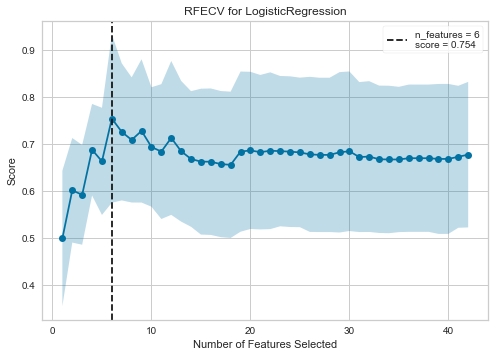

In [46]:
from sklearn.model_selection import StratifiedKFold
from yellowbrick.model_selection import RFECV

cv = StratifiedKFold(5)
visualizer = RFECV(LogisticRegression(solver='liblinear', random_state=2), cv=cv, scoring='roc_auc')

visualizer.fit(X, y)        # Fit the data to the visualizer
visualizer.show()           # Final

/opt/anaconda3/lib/python3.7/site-packages/yellowbrick/base.py:246: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


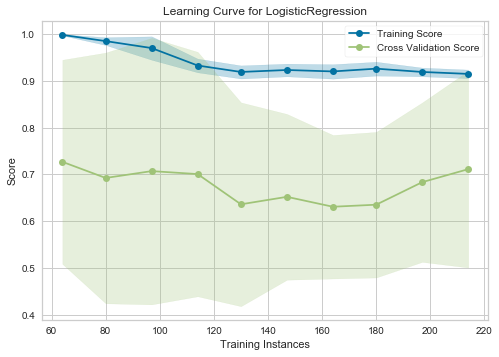

In [47]:
import numpy as np

from sklearn.model_selection import StratifiedKFold
from yellowbrick.model_selection import LearningCurve

# Create the learning curve visualizer
cv = StratifiedKFold(n_splits=12)
sizes = np.linspace(0.3, 1.0, 10)

# Instantiate the classification model and visualizer
model = LogisticRegression(solver='liblinear', random_state=2)
visualizer = LearningCurve(
    model, cv=cv, scoring='roc_auc', train_sizes=sizes, n_jobs=4
)

visualizer.fit(X, y)        # Fit the data to the visualizer
visualizer.show()           # Finalize and render the figure

/opt/anaconda3/lib/python3.7/site-packages/yellowbrick/base.py:246: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


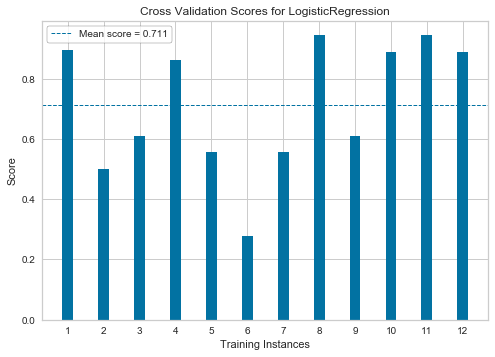

In [48]:
from sklearn.model_selection import StratifiedKFold
from yellowbrick.model_selection import CVScores

# Create a cross-validation strategy
cv = StratifiedKFold(n_splits=12, random_state=42)

# Instantiate the classification model and visualizer
model = LogisticRegression(solver='liblinear', random_state=2)
visualizer = CVScores(model, cv=cv, scoring='roc_auc')

visualizer.fit(X, y)        # Fit the data to the visualizer
visualizer.show()           # Finalize and render the figure

In [56]:
X = df.drop(['Player','SOS','FG','FGA','FG%', '2P','2PA','2P%','3P','3PA','3P%','FTA','FT%','TRB',
'STL','BLK','PF','PTS','ORtg','DRtg','TS%','eFG%','3PAr','FTr', 'ORB%','DRB%','TRB%','AST%',
 'BLK%','TOV%','AST:TOV','Hght\n(inches)','Weight','RSCI Rank', 
'Avg Measured Wingspan (inches', 'Difference', 'All Star'], axis=1)
y = df['All Star']

In [57]:
X

Age   FT  AST  TOV   PER  STL%  Max Measured Wingspan (inches)
0    19.096  8.4  6.2  3.6  32.5   3.0                           76.00
1    19.208  4.0  4.7  3.5  19.3   1.1                           78.75
2    21.051  6.7  4.8  2.4  29.9   3.1                           75.50
3    22.123  7.6  4.8  4.0  30.9   2.1                           77.00
4    22.338  5.9  6.0  3.7  25.7   2.0                           78.00
..      ...  ...  ...  ...   ...   ...                             ...
230  19.197  3.5  1.7  3.3  30.7   1.5                           90.25
231  20.257  6.0  2.6  2.7  31.1   1.1                           86.75
232  19.239  1.7  2.7  3.4  26.4   1.9                           86.75
233  19.138  5.1  0.7  2.6  26.6   1.3                           88.00
234  19.292  3.7  1.3  3.2  17.6   1.1                           87.25

[235 rows x 7 columns]

/opt/anaconda3/lib/python3.7/site-packages/yellowbrick/base.py:246: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


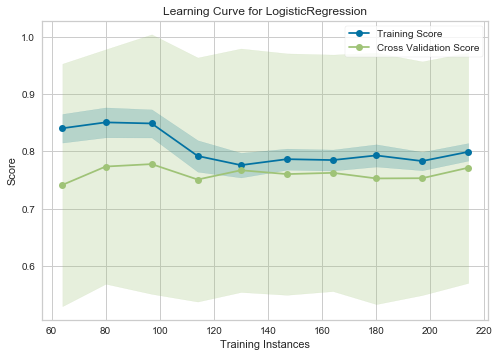

In [58]:
import numpy as np

from sklearn.model_selection import StratifiedKFold
from yellowbrick.model_selection import LearningCurve

# Create the learning curve visualizer
cv = StratifiedKFold(n_splits=12)
sizes = np.linspace(0.3, 1.0, 10)

# Instantiate the classification model and visualizer
model = LogisticRegression(solver='liblinear', random_state=2)
visualizer = LearningCurve(
    model, cv=cv, scoring='roc_auc', train_sizes=sizes, n_jobs=4
)

visualizer.fit(X, y)        # Fit the data to the visualizer
visualizer.show()           # Finalize and render the figure

/opt/anaconda3/lib/python3.7/site-packages/yellowbrick/base.py:246: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


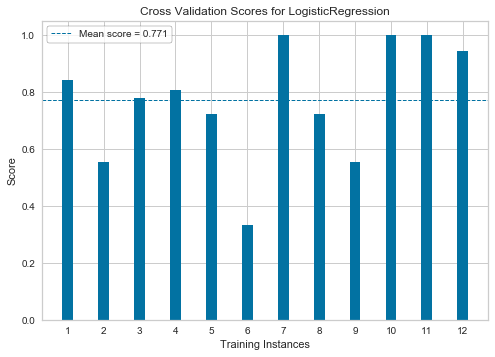

In [59]:
from sklearn.model_selection import StratifiedKFold
from yellowbrick.model_selection import CVScores

# Create a cross-validation strategy
cv = StratifiedKFold(n_splits=12, random_state=42)

# Instantiate the classification model and visualizer
model = LogisticRegression(solver='liblinear', random_state=2)
visualizer = CVScores(model, cv=cv, scoring='roc_auc')

visualizer.fit(X, y)        # Fit the data to the visualizer
visualizer.show()           # Finalize and render the figure

In [60]:
X

Age   FT  AST  TOV   PER  STL%  Max Measured Wingspan (inches)
0    19.096  8.4  6.2  3.6  32.5   3.0                           76.00
1    19.208  4.0  4.7  3.5  19.3   1.1                           78.75
2    21.051  6.7  4.8  2.4  29.9   3.1                           75.50
3    22.123  7.6  4.8  4.0  30.9   2.1                           77.00
4    22.338  5.9  6.0  3.7  25.7   2.0                           78.00
..      ...  ...  ...  ...   ...   ...                             ...
230  19.197  3.5  1.7  3.3  30.7   1.5                           90.25
231  20.257  6.0  2.6  2.7  31.1   1.1                           86.75
232  19.239  1.7  2.7  3.4  26.4   1.9                           86.75
233  19.138  5.1  0.7  2.6  26.6   1.3                           88.00
234  19.292  3.7  1.3  3.2  17.6   1.1                           87.25

[235 rows x 7 columns]

In [73]:
features = ['Age', 'FT', 'AST', 'TOV', 'PER','STL%', 'Max Measured Wingspan(inches)']

In [74]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

Train accuracy: 0.9261363636363636
Test accuracy: 0.9491525423728814
ROC AUC: 0.8988095238095237


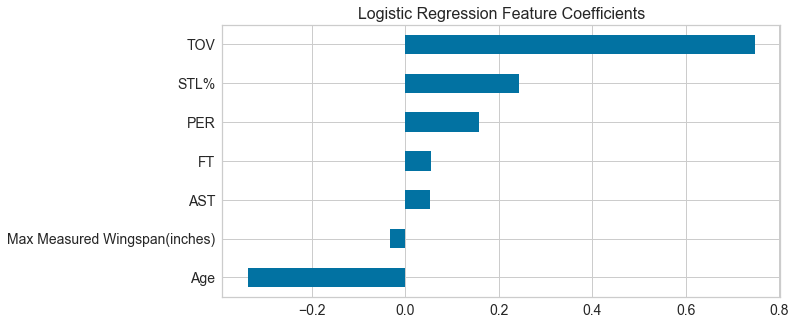

In [75]:
logreg = LogisticRegression(solver='liblinear', random_state=2).fit(x_train, y_train)
y_scores_logreg = logreg.predict_proba(x_test)[:,1]
y_pred_logreg = logreg.predict(x_test)

print("Train accuracy:",logreg.score(x_train, y_train))
print("Test accuracy:", logreg.score(x_test, y_test))
print("ROC AUC:", roc_auc_score(y_test, y_scores_logreg))

ax = pd.DataFrame(
    logreg.coef_.transpose(),
    index=features,
    columns=['coefficients']
).sort_values('coefficients').plot(
    kind='barh', legend=False, title='Logistic Regression Feature Coefficients', figsize=(10,5), fontsize=14
)

ax.title.set_size(16)

In [76]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [77]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

In [78]:
xg_cl = xgb.XGBClassifier()

In [79]:
params = {"max_depth": [10,30,50],
              "min_child_weight" : [1,3,6],
              "n_estimators": [200],
              "learning_rate": [0.05, 0.1,0.16],}

In [80]:
grid_search = GridSearchCV(xg_cl, params, cv = 3, verbose=10, n_jobs=-1)

In [81]:
grid_search.fit(X_train, Y_train)

Fitting 3 folds for each of 27 candidates, totalling 81 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    3.2s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1941s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.2s
[Parallel(n_jobs=-1)]: Done  45 tasks      | elapsed:    3.3s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0792s.) Setting batch_size=4.
[Parallel(n_jobs=-1)]: Done  66 out of  81 | elapsed:    3.4s remaining:    0.8s
[Parallel(n_jobs=-1)]: Done  75 out of  81 | elapsed:    3.4s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  81 out of  81 | elapsed:    3.4s finished


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='warn', n_jobs=-1,
             param_grid={'learning_rate': [0.05, 0.1, 0.16],
                         'max_depth': [10, 30, 50],
                         'min_child_weight': [1, 3, 6], 

In [82]:
grid_search.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.05, max_delta_step=0, max_depth=10,
              min_child_weight=6, missing=None, n_estimators=200, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [83]:
import sklearn.metrics as metrics
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score

In [84]:
xg = xgb.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.05, max_delta_step=0, max_depth=10,
              min_child_weight=6, missing=None, n_estimators=200, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1).fit(X_train, Y_train)
y_scores_xg = xg.predict_proba(X_test)[:,1]

print("Train Accuracy:",xg.score(X_train, Y_train))
print("Test Accuracy:", xg.score(X_test, Y_test))
print("ROC AUC:", roc_auc_score(Y_test, y_scores_xg))

Train Accuracy: 0.9204545454545454
Test Accuracy: 0.9491525423728814
ROC AUC: 0.8452380952380952


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  if sys.path[0] == '':


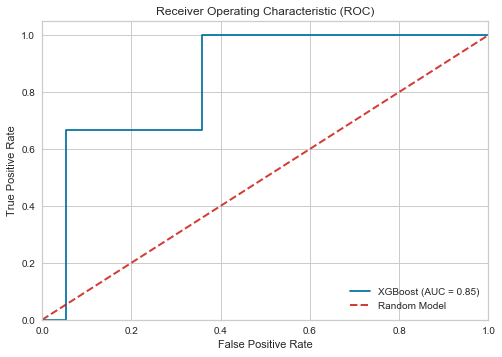

In [85]:
xg_roc_auc = roc_auc_score(Y_test, y_scores_xg)
fpr, tpr, thresholds = metrics.roc_curve(Y_test, y_scores_xg)
plt.plot(fpr, tpr, label='XGBoost (AUC = %0.2f)' % xg_roc_auc)
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
        label='Random Model', alpha=.8)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

In [97]:
import matplotlib.pyplot as plot

In [98]:
import shap

In [99]:
explainer = shap.TreeExplainer(xg)

In [100]:
shap_values = explainer.shap_values(X_train)

In [101]:
shap.initjs()

/opt/anaconda3/lib/python3.7/site-packages/shap/plots/summary.py:464: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  pl.show()


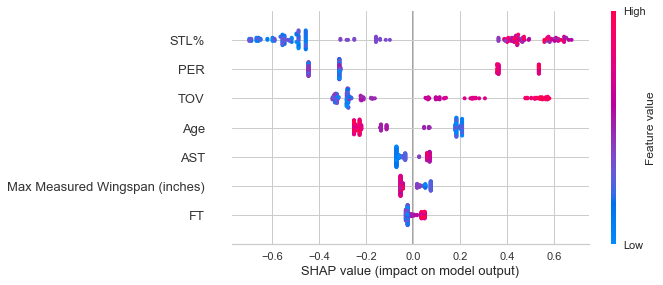

In [102]:
shap.summary_plot(shap_values, X_train)

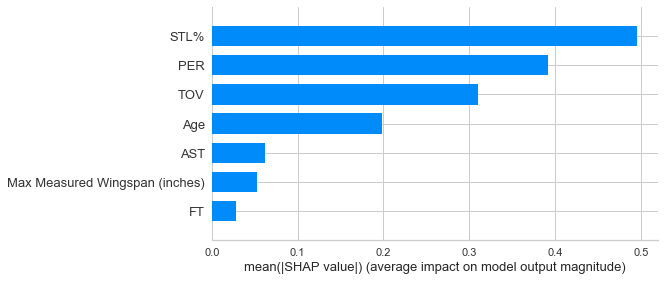

In [103]:
shap.summary_plot(shap_values, X_train, plot_type="bar")

/opt/anaconda3/lib/python3.7/site-packages/shap/plots/dependence.py:291: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  pl.show()


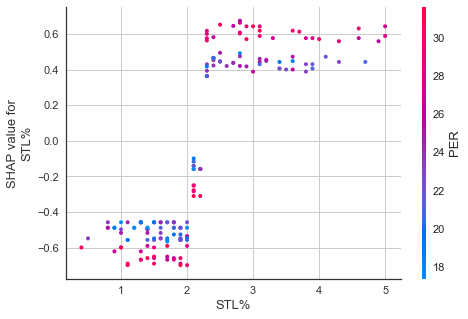

In [104]:
shap.dependence_plot("STL%", shap_values, X_train)

/opt/anaconda3/lib/python3.7/site-packages/shap/plots/dependence.py:291: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  pl.show()


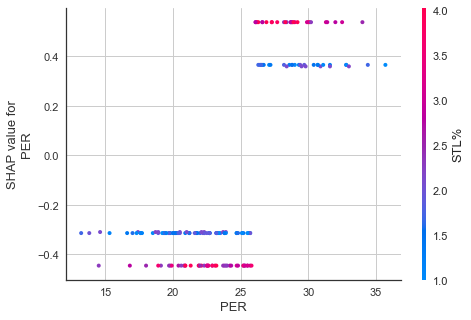

In [105]:
shap.dependence_plot("PER", shap_values, X_train)

/opt/anaconda3/lib/python3.7/site-packages/shap/plots/dependence.py:291: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  pl.show()


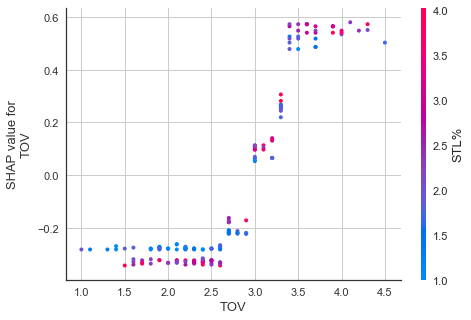

In [106]:
shap.dependence_plot("TOV", shap_values, X_train)

/opt/anaconda3/lib/python3.7/site-packages/shap/plots/dependence.py:291: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  pl.show()


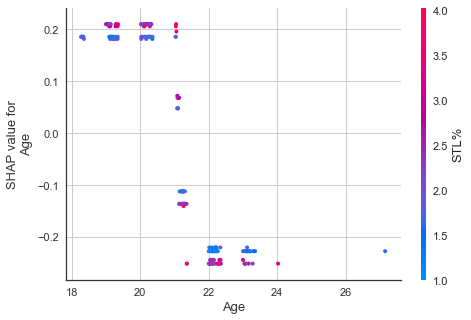

In [107]:
shap.dependence_plot("Age", shap_values, X_train)

/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:2534: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:2535: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/opt/anaconda3/lib/python3.7/site-packages/shap/plots/dependence.py:291: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  pl.show()


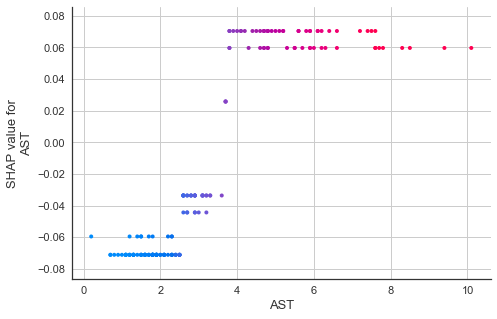

In [108]:
shap.dependence_plot("AST", shap_values, X_train)

/opt/anaconda3/lib/python3.7/site-packages/shap/plots/dependence.py:291: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  pl.show()


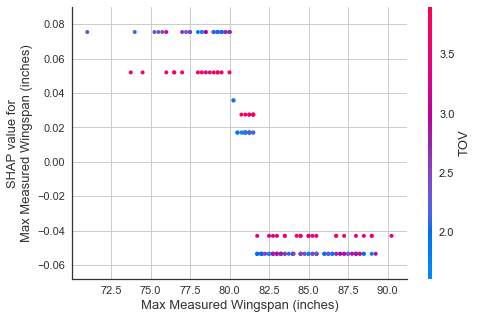

In [109]:
shap.dependence_plot("Max Measured Wingspan (inches)", shap_values, X_train)

/opt/anaconda3/lib/python3.7/site-packages/shap/plots/dependence.py:291: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  pl.show()


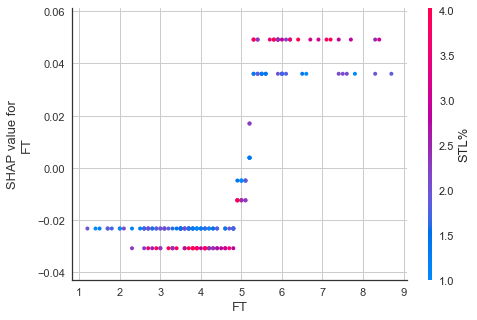

In [110]:
shap.dependence_plot("FT", shap_values, X_train)